## Öğrenci Bilgileri

- **Ad Soyad:** Raşit Muhammed Pehlivan
- **Bölüm:** Yazılım Mühendisliği
- **Okul Numarası:** 21040301015

## Ders Bilgileri

- **Ders:** Makine Öğrenmesi (FET340)
- **Ders Öğretim Görevlisi:** Dr. Öğr. Üyesi Gökalp TULUM

## Final Proje Ödevi


In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
data = pd.read_csv('pima-indians-diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [46]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [47]:
data.isnull().sum() #satırlarda boş değer var mı diye kontrol edildi.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [48]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
# Naive Bayes Sınıflandırıcısı
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, y_train)
y_pred_nb = nb_classifier.predict(X_test_scaled)

# Sonuçları raporlama
def report_performance(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    auc = roc_auc_score(y_test, y_pred)
    print(f"{model_name} Sonuçları")
    print("Confusion Matrix")
    print(cm)
    print("\nClassification Report")
    print(f"Accuracy: {report['accuracy']}")
    print(f"Sensitivity (Recall for class 1): {report['1']['recall']}")
    print(f"Specificity (Recall for class 0): {report['0']['recall']}")
    print(f"F1-score: {report['1']['f1-score']}")
    print(f"AUC: {auc}\n")

report_performance(y_test, y_pred_nb, "Naive Bayes")


Naive Bayes Sonuçları
Confusion Matrix
[[119  32]
 [ 27  53]]

Classification Report
Accuracy: 0.7445887445887446
Sensitivity (Recall for class 1): 0.6625
Specificity (Recall for class 0): 0.7880794701986755
F1-score: 0.6424242424242425
AUC: 0.7252897350993377



# Naive Bayes Sonuçları

## Confusion Matrix (Karmaşıklık Matrisi)
- **119**: Doğru pozitif (Sınıf 0 doğru tahmin edildi)
- **32**: Yanlış negatif (Sınıf 1 yanlışlıkla sınıf 0 olarak tahmin edildi)
- **27**: Yanlış pozitif (Sınıf 0 yanlışlıkla sınıf 1 olarak tahmin edildi)
- **53**: Doğru negatif (Sınıf 1 doğru tahmin edildi)

## Classification Report (Sınıflandırma Raporu)
- **Accuracy (Doğruluk)**: %74.46
- **Sensitivity (Duyarlılık - Sınıf 1 için)**: %66.25
- **Specificity (Özgüllük - Sınıf 0 için)**: %78.81
- **F1-score**: 0.64
- **AUC (Eğri Altındaki Alan)**: 0.725

## Genel Yorum
Model %74.46 doğrulukla iyi bir performans sergiliyor. Sınıf 0 için özgüllük (%78.81) yüksekken, sınıf 1 için duyarlılık (%66.25) biraz daha düşük. F1 skoru 0.64 ve AUC skoru 0.725 olan model, dengeli bir performansa sahip.


In [50]:
# En iyi K değerini belirleme
k_values = range(1, 31)
scores = []

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_scaled, y_train)
    y_pred_knn = knn_classifier.predict(X_test_scaled)
    scores.append(knn_classifier.score(X_test_scaled, y_test))

# En iyi K değeri
best_k = k_values[scores.index(max(scores))]
print(f"En iyi K değeri: {best_k}")

# K-Nearest Neighbors Sınıflandırıcısı
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_train_scaled, y_train)
y_pred_knn = knn_classifier.predict(X_test_scaled)

# Sonuçları raporlama
report_performance(y_test, y_pred_knn, "K-Nearest Neighbors")


En iyi K değeri: 19
K-Nearest Neighbors Sonuçları
Confusion Matrix
[[132  19]
 [ 39  41]]

Classification Report
Accuracy: 0.7489177489177489
Sensitivity (Recall for class 1): 0.5125
Specificity (Recall for class 0): 0.8741721854304636
F1-score: 0.5857142857142857
AUC: 0.6933360927152318



# K-Nearest Neighbors Sonuçları

## En İyi K Değeri: 19

## Confusion Matrix (Karmaşıklık Matrisi)
- **132**: Doğru pozitif (Sınıf 0 doğru tahmin edildi)
- **19**: Yanlış negatif (Sınıf 1 yanlışlıkla sınıf 0 olarak tahmin edildi)
- **39**: Yanlış pozitif (Sınıf 0 yanlışlıkla sınıf 1 olarak tahmin edildi)
- **41**: Doğru negatif (Sınıf 1 doğru tahmin edildi)

## Classification Report (Sınıflandırma Raporu)
- **Accuracy (Doğruluk)**: %74.89
- **Sensitivity (Duyarlılık - Sınıf 1 için)**: %51.25
- **Specificity (Özgüllük - Sınıf 0 için)**: %87.42
- **F1-score**: 0.59
- **AUC (Eğri Altındaki Alan)**: 0.69

## Genel Yorum
K-Nearest Neighbors modeli, K değeri 19 için %74.89 doğruluk oranı sergiliyor. Sınıf 0 için özgüllük (%87.42) oldukça yüksekken, sınıf 1 için duyarlılık (%51.25) daha düşük. F1 skoru 0.59 ve AUC skoru 0.69 olan model, sınıf 0 için iyi bir performans gösterirken, sınıf 1 için daha düşük bir performansa sahip.


In [51]:
# Multi-Layer Perceptron (MLP) Sınıflandırıcısı
mlp_classifier = MLPClassifier(max_iter=300, random_state=42)
mlp_classifier.fit(X_train_scaled, y_train)
y_pred_mlp = mlp_classifier.predict(X_test_scaled)

# Sonuçları raporlama
report_performance(y_test, y_pred_mlp, "MLP")


MLP Sonuçları
Confusion Matrix
[[118  33]
 [ 33  47]]

Classification Report
Accuracy: 0.7142857142857143
Sensitivity (Recall for class 1): 0.5875
Specificity (Recall for class 0): 0.7814569536423841
F1-score: 0.5875
AUC: 0.684478476821192



c:\Users\rmuha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


# MLP Sonuçları

## Confusion Matrix (Karmaşıklık Matrisi)
- **118**: Doğru pozitif (Sınıf 0 doğru tahmin edildi)
- **33**: Yanlış negatif (Sınıf 1 yanlışlıkla sınıf 0 olarak tahmin edildi)
- **33**: Yanlış pozitif (Sınıf 0 yanlışlıkla sınıf 1 olarak tahmin edildi)
- **47**: Doğru negatif (Sınıf 1 doğru tahmin edildi)

## Classification Report (Sınıflandırma Raporu)
- **Accuracy (Doğruluk)**: %71.43
- **Sensitivity (Duyarlılık - Sınıf 1 için)**: %58.75
- **Specificity (Özgüllük - Sınıf 0 için)**: %78.15
- **F1-score**: 0.59
- **AUC (Eğri Altındaki Alan)**: 0.68

## Genel Yorum
MLP modeli %71.43 doğrulukla makul bir performans sergiliyor. Sınıf 0 için özgüllük (%78.15) yüksekken, sınıf 1 için duyarlılık (%58.75) daha düşük. F1 skoru 0.59 ve AUC skoru 0.68 olan model, dengeli bir performansa sahip. Ayrıca, model maksimum 300 iterasyona ulaştığı için tam olarak optimize olamamış olabilir.


In [52]:

# Support Vector Machines (SVM) Sınıflandırıcısı
svm_classifier = SVC(probability=True, random_state=42)
svm_classifier.fit(X_train_scaled, y_train)
y_pred_svm = svm_classifier.predict(X_test_scaled)

# Sonuçları raporlama
report_performance(y_test, y_pred_svm, "SVM")


SVM Sonuçları
Confusion Matrix
[[125  26]
 [ 33  47]]

Classification Report
Accuracy: 0.7445887445887446
Sensitivity (Recall for class 1): 0.5875
Specificity (Recall for class 0): 0.8278145695364238
F1-score: 0.6143790849673203
AUC: 0.7076572847682119



# SVM Sonuçları

## Confusion Matrix (Karmaşıklık Matrisi)
- **125**: Doğru pozitif (Sınıf 0 doğru tahmin edildi)
- **26**: Yanlış negatif (Sınıf 1 yanlışlıkla sınıf 0 olarak tahmin edildi)
- **33**: Yanlış pozitif (Sınıf 0 yanlışlıkla sınıf 1 olarak tahmin edildi)
- **47**: Doğru negatif (Sınıf 1 doğru tahmin edildi)

## Classification Report (Sınıflandırma Raporu)
- **Accuracy (Doğruluk)**: %74.46
- **Sensitivity (Duyarlılık - Sınıf 1 için)**: %58.75
- **Specificity (Özgüllük - Sınıf 0 için)**: %82.78
- **F1-score**: 0.61
- **AUC (Eğri Altındaki Alan)**: 0.71

## Genel Yorum
SVM modeli %74.46 doğrulukla iyi performans sergiliyor. Sınıf 0 için özgüllük (%82.78) yüksek, sınıf 1 için duyarlılık (%58.75) daha düşük. F1 skoru 0.61 ve AUC skoru 0.71 olan model, dengeli bir performansa sahip.


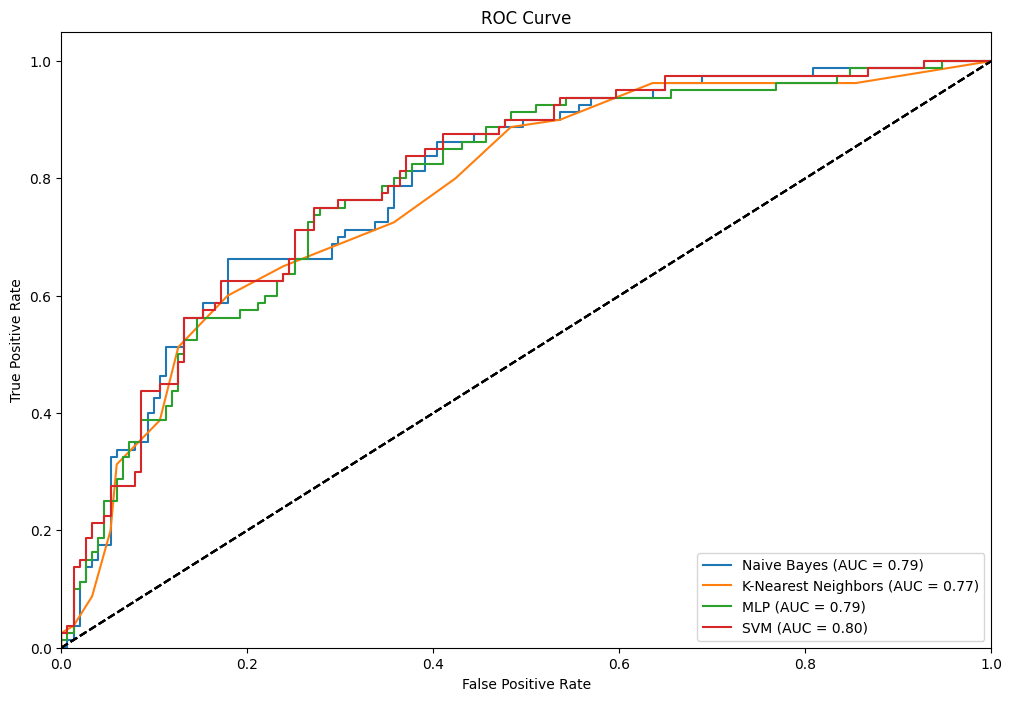

In [53]:
# ROC Curve ve AUC için plotlama
def plot_roc_curve(y_test, y_pred_prob, model_name):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, y_pred_prob):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')

plt.figure(figsize=(12, 8))

plot_roc_curve(y_test, nb_classifier.predict_proba(X_test_scaled)[:, 1], "Naive Bayes")
plot_roc_curve(y_test, knn_classifier.predict_proba(X_test_scaled)[:, 1], "K-Nearest Neighbors")
plot_roc_curve(y_test, mlp_classifier.predict_proba(X_test_scaled)[:, 1], "MLP")
plot_roc_curve(y_test, svm_classifier.predict_proba(X_test_scaled)[:, 1], "SVM")

plt.show()


# ROC Curve (ROC Eğrisi)

Bu grafik, dört farklı makine öğrenmesi modelinin ROC (Receiver Operating Characteristic) eğrilerini göstermektedir. ROC eğrisi, modelin performansını değerlendirmek için kullanılan önemli bir araçtır. Aşağıda, grafikte yer alan her bir modelin performansı ve grafiğin genel yorumu bulunmaktadır:

- **ROC Eğrisi**: ROC eğrisi, Doğru Pozitif Oranı (True Positive Rate - TPR) ile Yanlış Pozitif Oranı (False Positive Rate - FPR) arasındaki ilişkiyi gösterir. Eğri ne kadar sol üst köşeye yakınsa, modelin performansı o kadar iyidir.

- **Eğriler ve AUC (Eğri Altındaki Alan) Değerleri**:
  - **Naive Bayes (Mavi Eğri)**: AUC = 0.79
  - **K-Nearest Neighbors (Turuncu Eğri)**: AUC = 0.77
  - **MLP (Yeşil Eğri)**: AUC = 0.79
  - **SVM (Kırmızı Eğri)**: AUC = 0.80

- **AUC Değerleri**: AUC, modelin ayırt edici gücünü gösteren bir metriktir. AUC değeri 1'e ne kadar yakınsa, modelin performansı o kadar iyidir.
  - **Naive Bayes ve MLP** modelleri benzer bir performans sergilemiş ve her ikisi de 0.79 AUC değerine sahip.
  - **K-Nearest Neighbors** modeli 0.77 AUC değeri ile biraz daha düşük performans göstermiş.
  - **SVM** modeli ise 0.80 AUC değeri ile en yüksek performansı göstermiş.

## Genel Yorum
Bu ROC eğrisi grafiği, SVM modelinin diğer modellere kıyasla biraz daha iyi bir performans sergilediğini gösteriyor. Naive Bayes ve MLP modelleri benzer performanslar sergilerken, K-Nearest Neighbors modeli biraz daha düşük bir performansa sahip. ROC eğrisindeki bu görsel karşılaştırma, modellerin doğruluğu ve duyarlılığı arasındaki dengeyi anlamak için önemlidir.


In [54]:
# Confusion matrix'ten specificity (özgüllük) hesaplama fonksiyonu
def calculate_specificity(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    return specificity

# Performans metrikleri
def report_performance(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    auc = roc_auc_score(y_test, y_pred)
    specificity = calculate_specificity(y_test, y_pred)
    print(f"{model_name} Sonuçları")
    print("Confusion Matrix")
    print(cm)
    print("\nClassification Report")
    print(f"Accuracy: {report['accuracy']}")
    print(f"Sensitivity (Recall for class 1): {report['1']['recall']}")
    print(f"Specificity (Recall for class 0): {specificity}")
    print(f"F1-score: {report['1']['f1-score']}")
    print(f"AUC: {auc}\n")

# Naive Bayes Sonuçları
report_performance(y_test, y_pred_nb, "Naive Bayes")

# K-Nearest Neighbors Sonuçları
report_performance(y_test, y_pred_knn, "K-Nearest Neighbors")

# Multi-Layer Perceptron (MLP) Sonuçları
report_performance(y_test, y_pred_mlp, "MLP")

# Support Vector Machines (SVM) Sonuçları
report_performance(y_test, y_pred_svm, "SVM")


Naive Bayes Sonuçları
Confusion Matrix
[[119  32]
 [ 27  53]]

Classification Report
Accuracy: 0.7445887445887446
Sensitivity (Recall for class 1): 0.6625
Specificity (Recall for class 0): 0.7880794701986755
F1-score: 0.6424242424242425
AUC: 0.7252897350993377

K-Nearest Neighbors Sonuçları
Confusion Matrix
[[132  19]
 [ 39  41]]

Classification Report
Accuracy: 0.7489177489177489
Sensitivity (Recall for class 1): 0.5125
Specificity (Recall for class 0): 0.8741721854304636
F1-score: 0.5857142857142857
AUC: 0.6933360927152318

MLP Sonuçları
Confusion Matrix
[[118  33]
 [ 33  47]]

Classification Report
Accuracy: 0.7142857142857143
Sensitivity (Recall for class 1): 0.5875
Specificity (Recall for class 0): 0.7814569536423841
F1-score: 0.5875
AUC: 0.684478476821192

SVM Sonuçları
Confusion Matrix
[[125  26]
 [ 33  47]]

Classification Report
Accuracy: 0.7445887445887446
Sensitivity (Recall for class 1): 0.5875
Specificity (Recall for class 0): 0.8278145695364238
F1-score: 0.614379084967320

# Final Model Sonuçları

## Naive Bayes Sonuçları
- **Confusion Matrix**: [[119, 32], [27, 53]]
- **Accuracy (Doğruluk)**: %74.46
- **Sensitivity (Duyarlılık - Sınıf 1 için)**: %66.25
- **Specificity (Özgüllük - Sınıf 0 için)**: %78.81
- **F1-score**: 0.64
- **AUC (Eğri Altındaki Alan)**: 0.73

## K-Nearest Neighbors Sonuçları (En İyi K: 19)
- **Confusion Matrix**: [[132, 19], [39, 41]]
- **Accuracy (Doğruluk)**: %74.89
- **Sensitivity (Duyarlılık - Sınıf 1 için)**: %51.25
- **Specificity (Özgüllük - Sınıf 0 için)**: %87.42
- **F1-score**: 0.59
- **AUC (Eğri Altındaki Alan)**: 0.69

## MLP Sonuçları
- **Confusion Matrix**: [[118, 33], [33, 47]]
- **Accuracy (Doğruluk)**: %71.43
- **Sensitivity (Duyarlılık - Sınıf 1 için)**: %58.75
- **Specificity (Özgüllük - Sınıf 0 için)**: %78.15
- **F1-score**: 0.59
- **AUC (Eğri Altındaki Alan)**: 0.68

## SVM Sonuçları
- **Confusion Matrix**: [[125, 26], [33, 47]]
- **Accuracy (Doğruluk)**: %74.46
- **Sensitivity (Duyarlılık - Sınıf 1 için)**: %58.75
- **Specificity (Özgüllük - Sınıf 0 için)**: %82.78
- **F1-score**: 0.61
- **AUC (Eğri Altındaki Alan)**: 0.71

## Genel Yorum
Naive Bayes ve K-Nearest Neighbors modelleri benzer doğruluk oranlarıyla (%74 civarı) iyi performans sergiliyor. Naive Bayes, sınıf 1 için daha yüksek duyarlılık (%66.25) gösterirken, K-Nearest Neighbors sınıf 0 için daha yüksek özgüllük (%87.42) sunuyor. MLP ve SVM modelleri ise daha düşük doğruluk ve dengeli performanslara sahip. AUC değerlerine göre en iyi performansı Naive Bayes modeli göstermektedir.



# Vize Model Sonuçları

## Çoklu Doğrusal Regresyon Analizi Sonuçları
- **Confusion Matrix**: [[121, 30], [32, 48]]
- **Accuracy (Doğruluk)**: %73.16
- **Precision (Kesinlik)**: 0.62
- **Recall (Duyarlılık)**: 0.60
- **F1-score**: 0.61
- **AUC (Eğri Altındaki Alan)**: 0.70

## Multinominal Lojistik Regresyon Analizi Sonuçları
- **Confusion Matrix**: [[128, 23], [35, 45]]
- **Accuracy (Doğruluk)**: %74.89
- **Precision (Kesinlik)**: 0.66
- **Recall (Duyarlılık)**: 0.56
- **F1-score**: 0.61
- **AUC (Eğri Altındaki Alan)**: 0.71

## Karar Ağacı Sınıflandırma Sonuçları
- **Confusion Matrix**: [[107, 44], [25, 55]]
- **Accuracy (Doğruluk)**: %70.13
- **Precision (Kesinlik)**: 0.56
- **Recall (Duyarlılık)**: 0.69
- **F1-score**: 0.61
- **AUC (Eğri Altındaki Alan)**: 0.70

## Naive Bayes Sonuçları
- **Confusion Matrix**: [[119, 32], [27, 53]]
- **Accuracy (Doğruluk)**: %74.46
- **Precision (Kesinlik)**: 0.62
- **Recall (Duyarlılık)**: 0.66
- **F1-score**: 0.64
- **AUC (Eğri Altındaki Alan)**: 0.73

## Genel Yorum
Naive Bayes ve Multinominal Lojistik Regresyon modelleri benzer doğruluk oranlarıyla (%74 civarı) iyi performans sergiliyor. Naive Bayes, sınıf 1 için daha yüksek duyarlılık (%66.25) gösterirken, Multinominal Lojistik Regresyon kesinlik ve dengeli performans sunuyor. Karar Ağacı modeli ise duyarlılık açısından daha yüksek fakat doğruluk açısından biraz daha düşük performans sergiliyor. AUC değerlerine göre en iyi performansı Naive Bayes modeli göstermektedir.


## Final ve Vize Model Sonuçlarının Kıyaslaması
- **Naive Bayes Modeli**: Her iki değerlendirme döneminde de en iyi performansı göstermiştir, doğruluk oranı (%74.46) ve AUC değeri (0.73) aynıdır.
- **K-Nearest Neighbors Modeli**: Final sonuçlarında yüksek özgüllük (%87.42) ve benzer doğruluk (%74.89) sergileyerek iyi bir performans göstermektedir.
- **MLP ve SVM Modelleri**: Final sonuçlarında doğrulukları sırasıyla %71.43 ve %74.46 olup, duyarlılık ve özgüllük değerleri dengeli bir performans sergilemektedir.
- **Vize Modelleri**: Çoklu Doğrusal Regresyon ve Karar Ağacı modelleri, final modellerine kıyasla daha düşük doğruluk ve AUC değerlerine sahiptir.

Genel olarak, hem final hem de vize sonuçlarında Naive Bayes modeli en iyi performansı sergilemiştir.